In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [15]:
def run_all_models(X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded):
    models = {
        "LogisticRegression": LogisticRegression(),
        # "SVC": SVC(),
        "DecisionTreeClassifier": DecisionTreeClassifier(random_state=42),
        "RandomForestClassifier": RandomForestClassifier(random_state=42),
        "KNeighborsClassifier": KNeighborsClassifier(),
        "GradientBoostingClassifier": GradientBoostingClassifier(random_state=42),
        "GaussianNB": GaussianNB(),
    }

    # Create an empty DataFrame to store accuracy
    model_performance = []

    for name, model in models.items():
        model.fit(X_train_scaled, y_train_encoded)
        predictions = model.predict(X_test_scaled)
        accuracy = accuracy_score(y_test_encoded, predictions)
        print(f"{name} Accuracy:", accuracy)
        model_performance.append({"Model": name, "Accuracy": accuracy})

    # For the Sequential model
    sequential_model = Sequential()
    sequential_model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
    sequential_model.add(Dense(32, activation='relu'))
    sequential_model.add(Dense(1, activation='sigmoid'))
    sequential_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    sequential_model.fit(X_train_scaled, y_train_encoded, epochs=50, batch_size=10, verbose=1)
    loss, accuracy = sequential_model.evaluate(X_test_scaled, y_test_encoded)
    print(f"Sequential Model Accuracy: {accuracy}")
    print(f"Sequential Model Loss: {loss}")
    model_performance.append({"Model": "Sequential", "Accuracy": accuracy})

    return pd.DataFrame(model_performance)

In [17]:
df = pd.read_csv("covid.csv")
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


In [18]:
df.isna().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

In [7]:
df.duplicated().sum()

851112

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.dtypes

USMER                   int64
MEDICAL_UNIT            int64
SEX                     int64
PATIENT_TYPE            int64
INTUBED                 int64
PNEUMONIA               int64
AGE                     int64
PREGNANT                int64
DIABETES                int64
COPD                    int64
ASTHMA                  int64
INMSUPR                 int64
HIPERTENSION            int64
OTHER_DISEASE           int64
CARDIOVASCULAR          int64
OBESITY                 int64
RENAL_CHRONIC           int64
TOBACCO                 int64
CLASIFFICATION_FINAL    int64
ICU                     int64
dtype: object

In [10]:
df["CLASIFFICATION_FINAL"].nunique()

7

In [11]:
df["CLASIFFICATION_FINAL"].unique()

array([3, 5, 7, 6, 1, 2, 4])

In [19]:
df["CLASIFFICATION_FINAL"] = df["CLASIFFICATION_FINAL"].apply(lambda x: 1 if x <=3 else 0)
df["DATE_DIED"] = df["DATE_DIED"].apply(lambda x: 1 if x != "9999-99-99" else 0)

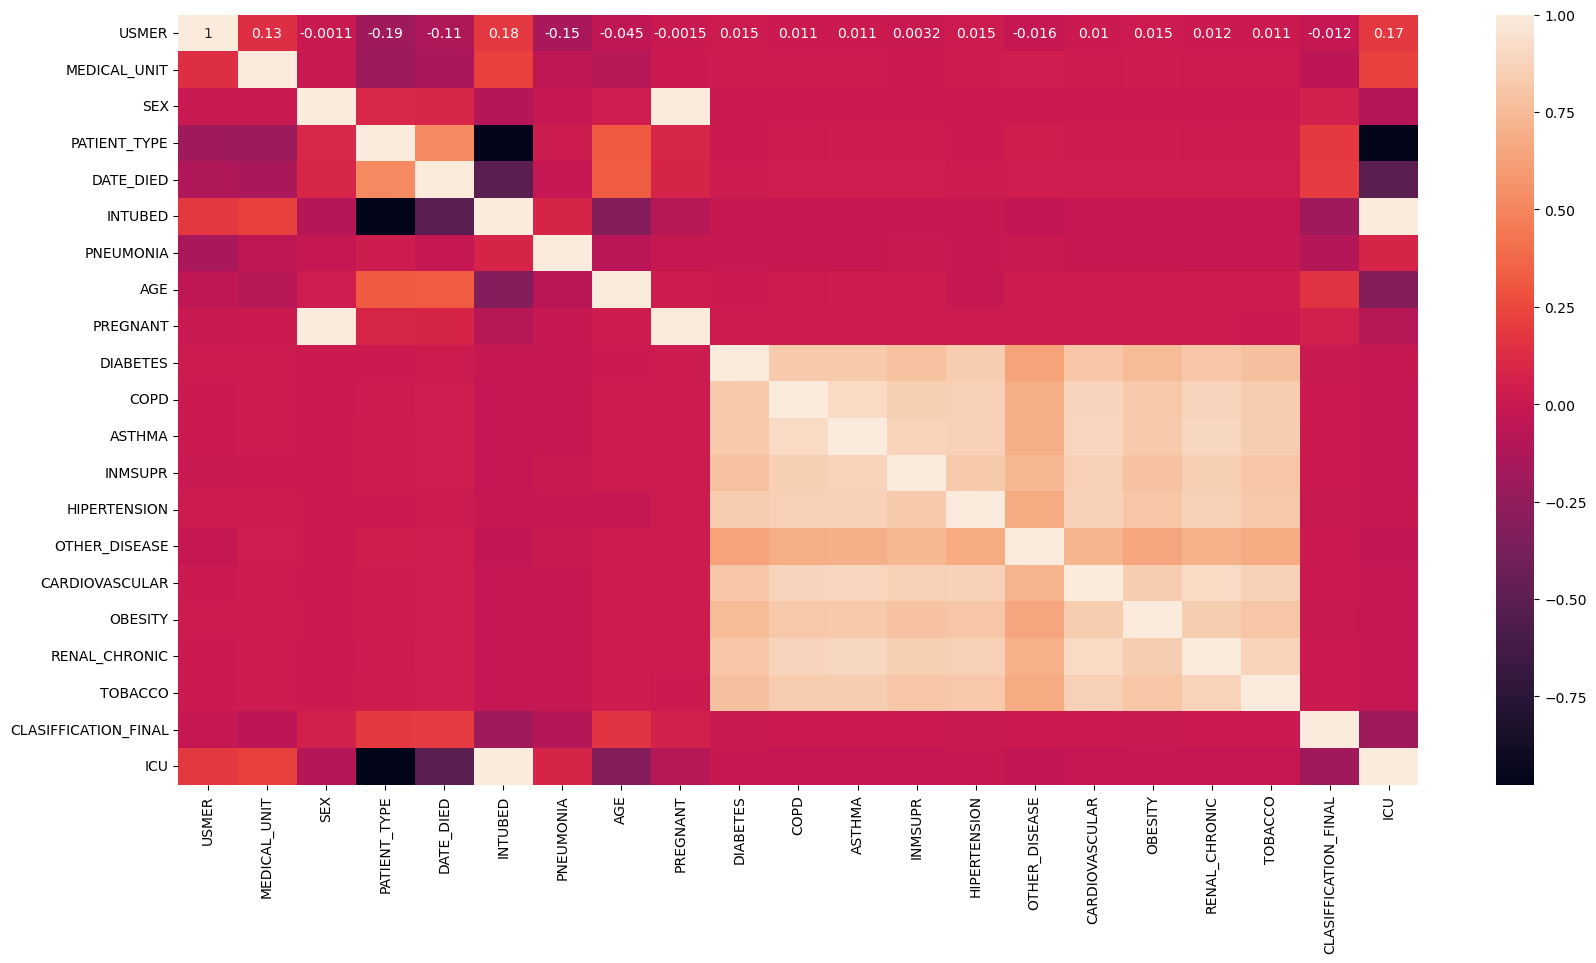

In [20]:
plt.figure(figsize=(20,10))
relations = df.corr()
sns.heatmap(data=relations, annot=True)
plt.show()

In [21]:
df["DATE_DIED"].value_counts()

DATE_DIED
0    971633
1     76942
Name: count, dtype: int64

In [23]:
df.drop(['ICU', 'INTUBED'], axis=1, inplace=True)

In [24]:
X, y = df.drop("DATE_DIED", axis=1), df["DATE_DIED"]

X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)

models = run_all_models(X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded)
models

LogisticRegression Accuracy: 0.9351548530148058
DecisionTreeClassifier Accuracy: 0.9300574589323606
RandomForestClassifier Accuracy: 0.9324464153732447
KNeighborsClassifier Accuracy: 0.9318932837422216
GradientBoostingClassifier Accuracy: 0.939980449657869
GaussianNB Accuracy: 0.9228142955916363
Epoch 1/50
83886/83886 [==============================] - 38s 451us/step - loss: 0.1340 - accuracy: 0.9368
Epoch 2/50
83886/83886 [==============================] - 43s 513us/step - loss: 0.1292 - accuracy: 0.9384
Epoch 3/50
83886/83886 [==============================] - 41s 483us/step - loss: 0.1286 - accuracy: 0.9387
Epoch 4/50
83886/83886 [==============================] - 37s 445us/step - loss: 0.1281 - accuracy: 0.9386
Epoch 5/50
83886/83886 [==============================] - 38s 454us/step - loss: 0.1280 - accuracy: 0.9388
Epoch 6/50
83886/83886 [==============================] - 38s 451us/step - loss: 0.1278 - accuracy: 0.9389
Epoch 7/50
83886/83886 [==============================] - 41s

,Model,Accuracy
0,LogisticRegression,0.935155
1,DecisionTreeClassifier,0.930057
2,RandomForestClassifier,0.932446
3,KNeighborsClassifier,0.931893
4,GradientBoostingClassifier,0.939980
5,GaussianNB,0.922814
6,Sequential,0.939709
